Sumber Data: https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust = pd.read_csv('customer_data.csv')
payment = pd.read_csv('payment_data.csv')

## Keterangan Dataset

### payment_data.csv: customer’s card payment history.

id: customer id

OVD_t1: number of times overdue type 1

OVD_t2: number of times overdue type 2

OVD_t3: number of times overdue type 3

OVD_sum: total overdue days

pay_normal: number of times normal payment

prod_code: credit product code

prod_limit: credit limit of product

update_date: account update date

new_balance: current balance of product

highest_balance: highest balance in history

report_date: date of recent payment

### customer_data.csv:

customer’s demographic data and category attributes which have been encoded.

Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.

label is 1, the customer is in high credit risk

label is 0, the customer is in low credit risk

In [3]:
cust.head(10)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,1,54984789,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,0,58984557,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


In [13]:
cust.shape

(1125, 13)

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [6]:
cust.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [7]:
cust['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

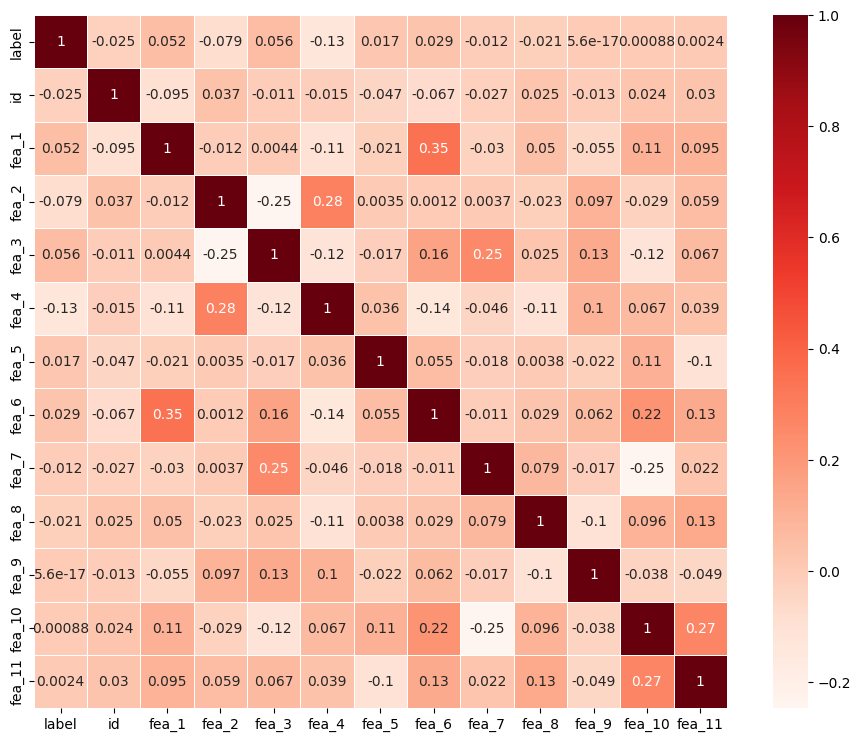

In [10]:
correlation_matrix = cust.corr()

fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Reds)
plt.show()

In [12]:
custclean = cust[['id','label']]
custclean.head()

,id,label
0,54982665,1
1,59004779,0
2,58990862,0
3,58995168,1
4,54987320,0


In [4]:
payment.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [14]:
payment.shape

(8250, 12)

In [15]:
gabungan = payment.merge(custclean, right_on='id', left_on='id')
gabungan.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,label
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN,0
1,58987402,0,0,0,0,1,0,NaN,04/10/2016,42000.0,35500.0,NaN,0
2,58987402,0,0,0,0,2,10,113300.0,13/02/2016,7938.0,7115.0,24/03/2016,0
3,58987402,0,0,0,0,9,10,NaN,27/07/2015,30039.6,48061.0,04/08/2016,0
4,58987402,0,0,0,0,1,0,NaN,07/12/2011,0.0,150500.0,NaN,0


In [16]:
gabungan.shape

(8250, 13)

C:\Users\HP\AppData\Local\Temp\ipykernel_11176\528885466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = gabungan.corr()


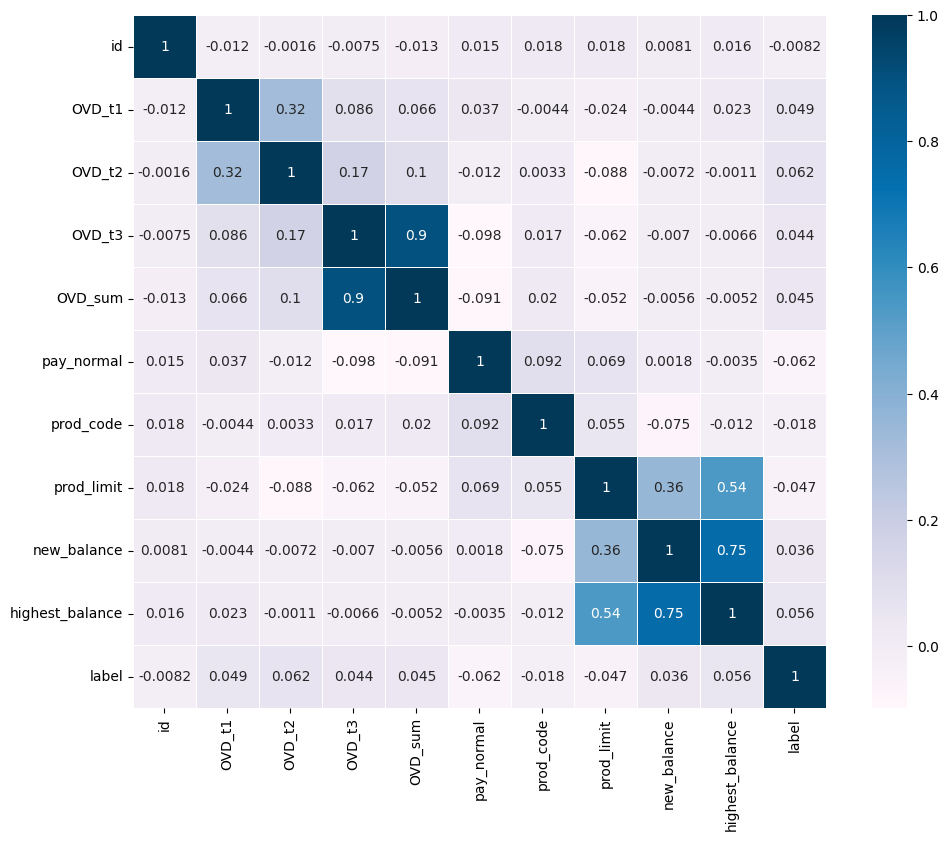

In [17]:
correlation_matrix = gabungan.corr()

fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap='PuBu')
plt.show()